In [14]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [15]:
df = pd.read_csv("../data/selected_M_best50.csv")
df = df.drop_duplicates()
print(df.head())

   ILMN_1651296  ILMN_1654609  ILMN_1655864  ILMN_1657898  ILMN_1660357  \
0        9.3790       13.1600        9.1206        8.9263        9.5279   
1        9.3431       13.6183        9.6620        8.6274        9.5668   
2        8.7567       12.5893        8.9047        8.3385        8.6186   
3        8.7806       12.4219        8.7785        8.2053        8.4064   
4        8.5279       12.0954        8.4493        8.2168        8.4192   

   ILMN_1667500  ILMN_1670218  ILMN_1670638  ILMN_1671005  ILMN_1677756  ...  \
0        8.4448       11.3745       11.0382       11.4310        9.9916  ...   
1        8.3387       11.7645       11.4380       12.1278       10.5783  ...   
2        8.0199       10.2609        9.5454       10.5202        9.3776  ...   
3        8.0968       10.1913        9.4288       10.2085        8.4853  ...   
4        8.1602       10.0457        9.3820       10.1140        8.5531  ...   

   ILMN_1805111  ILMN_1812970  ILMN_1852793  ILMN_1875248  ILMN_2082

In [16]:
cols = df.columns
print(len(cols))
print(cols)

51
Index(['ILMN_1651296', 'ILMN_1654609', 'ILMN_1655864', 'ILMN_1657898',
       'ILMN_1660357', 'ILMN_1667500', 'ILMN_1670218', 'ILMN_1670638',
       'ILMN_1671005', 'ILMN_1677756', 'ILMN_1679045', 'ILMN_1687526',
       'ILMN_1693635', 'ILMN_1698404', 'ILMN_1701962', 'ILMN_1704335',
       'ILMN_1706859', 'ILMN_1707631', 'ILMN_1713189', 'ILMN_1713764',
       'ILMN_1715771', 'ILMN_1725707', 'ILMN_1729832', 'ILMN_1732141',
       'ILMN_1740875', 'ILMN_1745788', 'ILMN_1755643', 'ILMN_1755911',
       'ILMN_1758687', 'ILMN_1762080', 'ILMN_1763364', 'ILMN_1765725',
       'ILMN_1767168', 'ILMN_1768391', 'ILMN_1772796', 'ILMN_1775304',
       'ILMN_1780334', 'ILMN_1785732', 'ILMN_1794233', 'ILMN_1798706',
       'ILMN_1804988', 'ILMN_1805111', 'ILMN_1812970', 'ILMN_1852793',
       'ILMN_1875248', 'ILMN_2082762', 'ILMN_2159384', 'ILMN_2203896',
       'ILMN_2272857', 'ILMN_2359627', 'Results'],
      dtype='object')


In [17]:
def map_results(inpt):
    if inpt == 'control':
        return 0;

    else:
        return 1;

df['Results'] = df['Results'].apply(map_results)

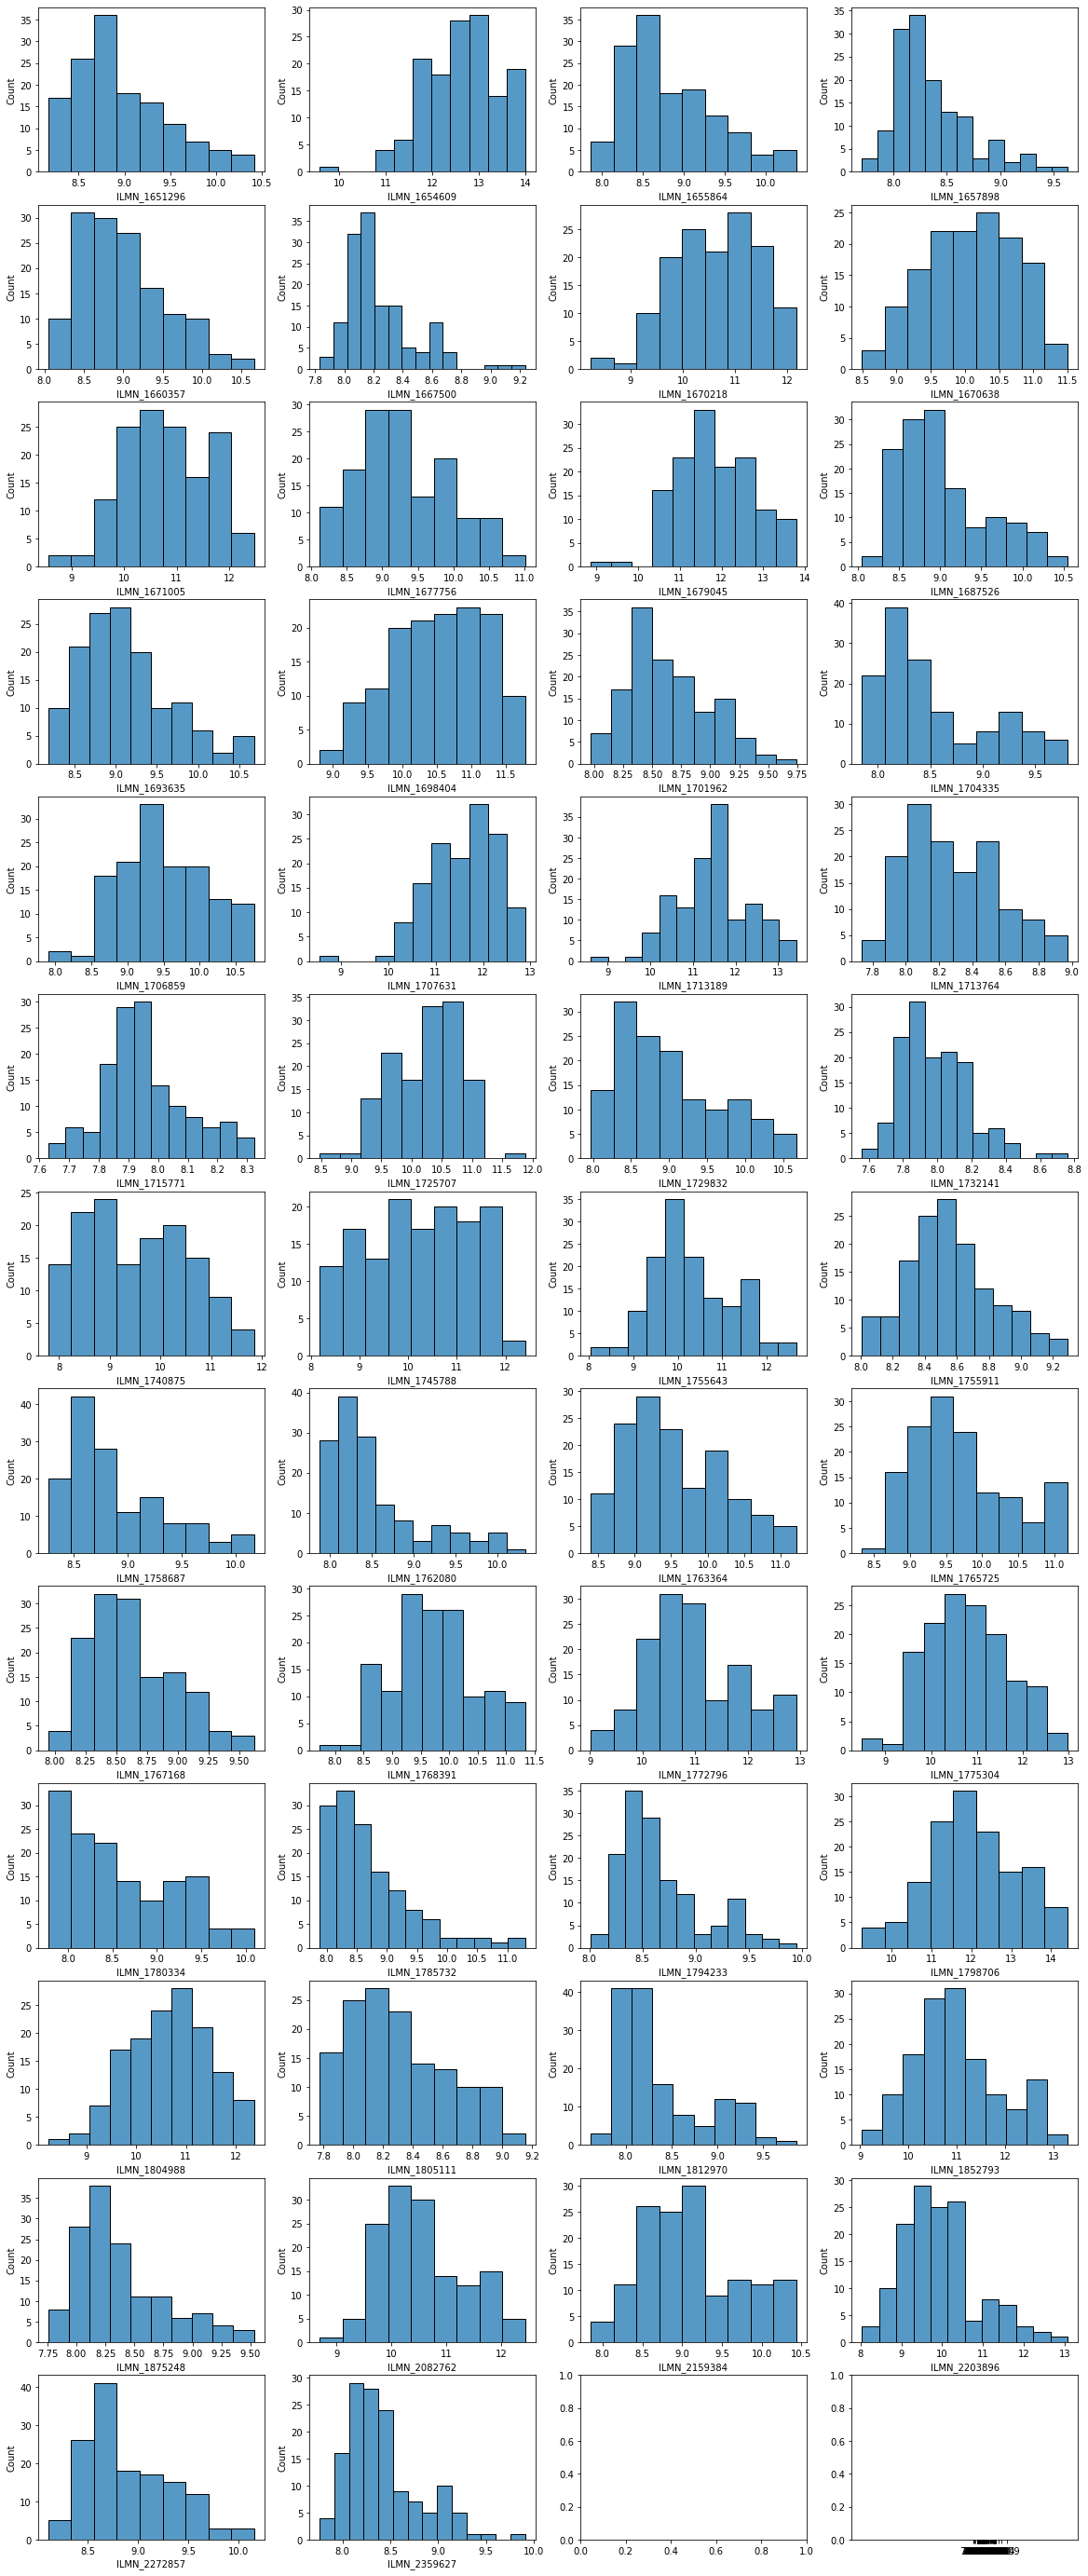

In [18]:
fig, axes = plt.subplots(13,4, figsize=(20,50))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:-1]):    
    sb.histplot(data=df, x=df[column],  ax=axes[x_,y_])
    plt.xticks(ticks=df[column].unique())
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    elif i == 11:
        x_ = 3
        y_ = 0
    elif i == 15:
        x_ = 4
        y_ = 0
    elif i == 19:
        x_ = 5
        y_ = 0
    elif i == 23:
        x_ = 6
        y_ = 0
    elif i == 27:
        x_ = 7
        y_ = 0
    elif i == 31:
        x_ = 8
        y_ = 0
    elif i == 35:
        x_ = 9
        y_ = 0
    elif i == 39:
        x_ = 10
        y_ = 0
    elif i == 43:
        x_ = 11
        y_ = 0
    elif i == 47:
        x_ = 12
        y_ = 0

    else:
        y_ += 1

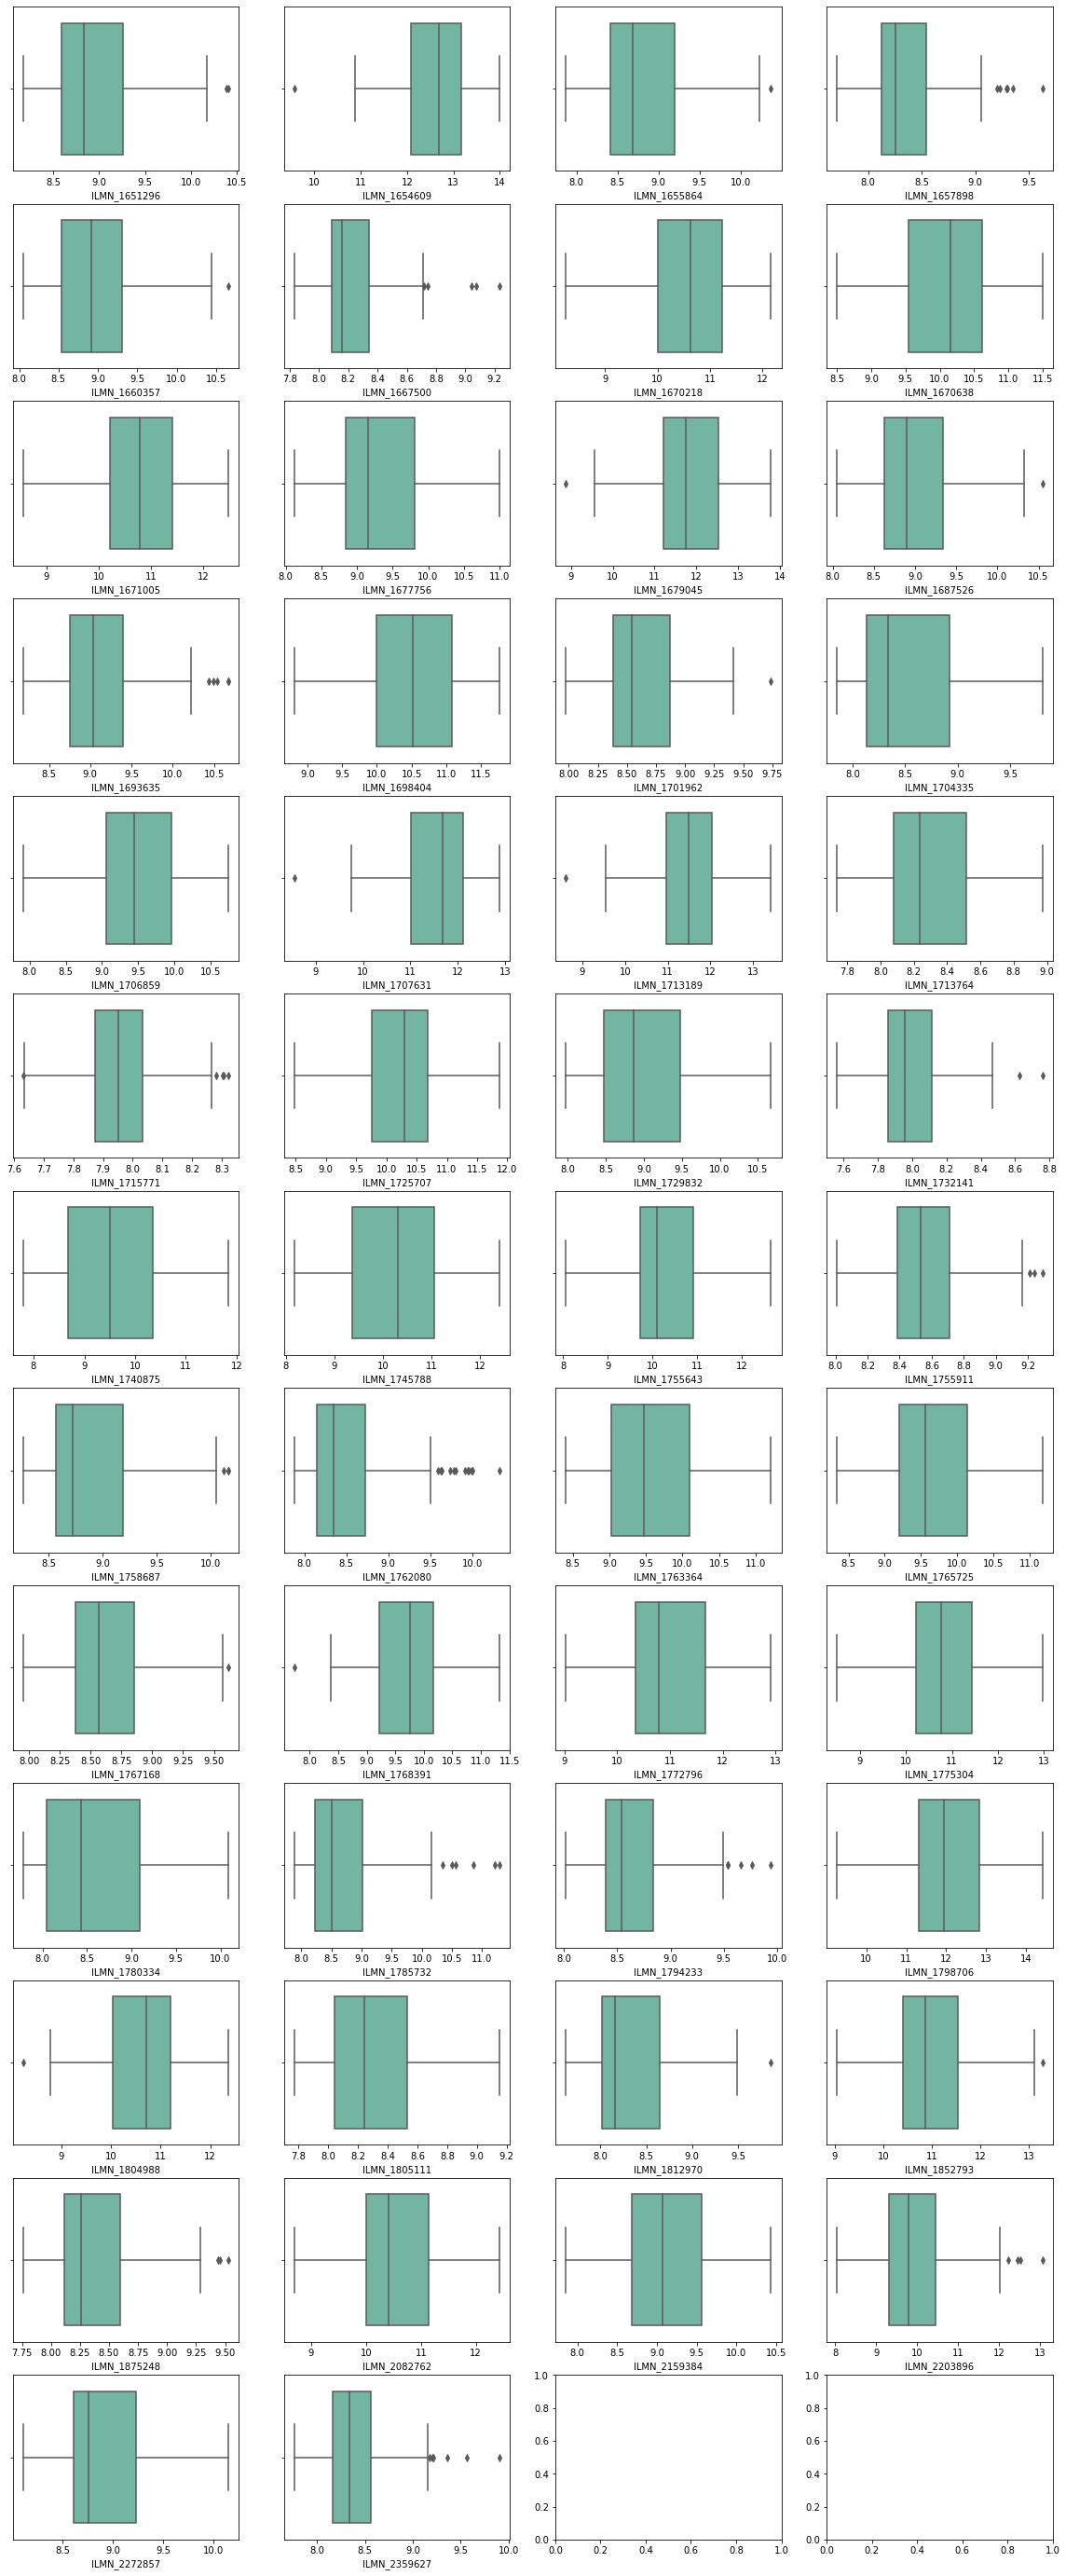

In [19]:
fig, axes = plt.subplots(13,4, figsize=(20,50))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:-1]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    elif i == 11:
        x_ = 3
        y_ = 0
    elif i == 15:
        x_ = 4
        y_ = 0
    elif i == 19:
        x_ = 5
        y_ = 0
    elif i == 23:
        x_ = 6
        y_ = 0
    elif i == 27:
        x_ = 7
        y_ = 0
    elif i == 31:
        x_ = 8
        y_ = 0
    elif i == 35:
        x_ = 9
        y_ = 0
    elif i == 39:
        x_ = 10
        y_ = 0
    elif i == 43:
        x_ = 11
        y_ = 0
    elif i == 47:
        x_ = 12
        y_ = 0

    else:
        y_ += 1

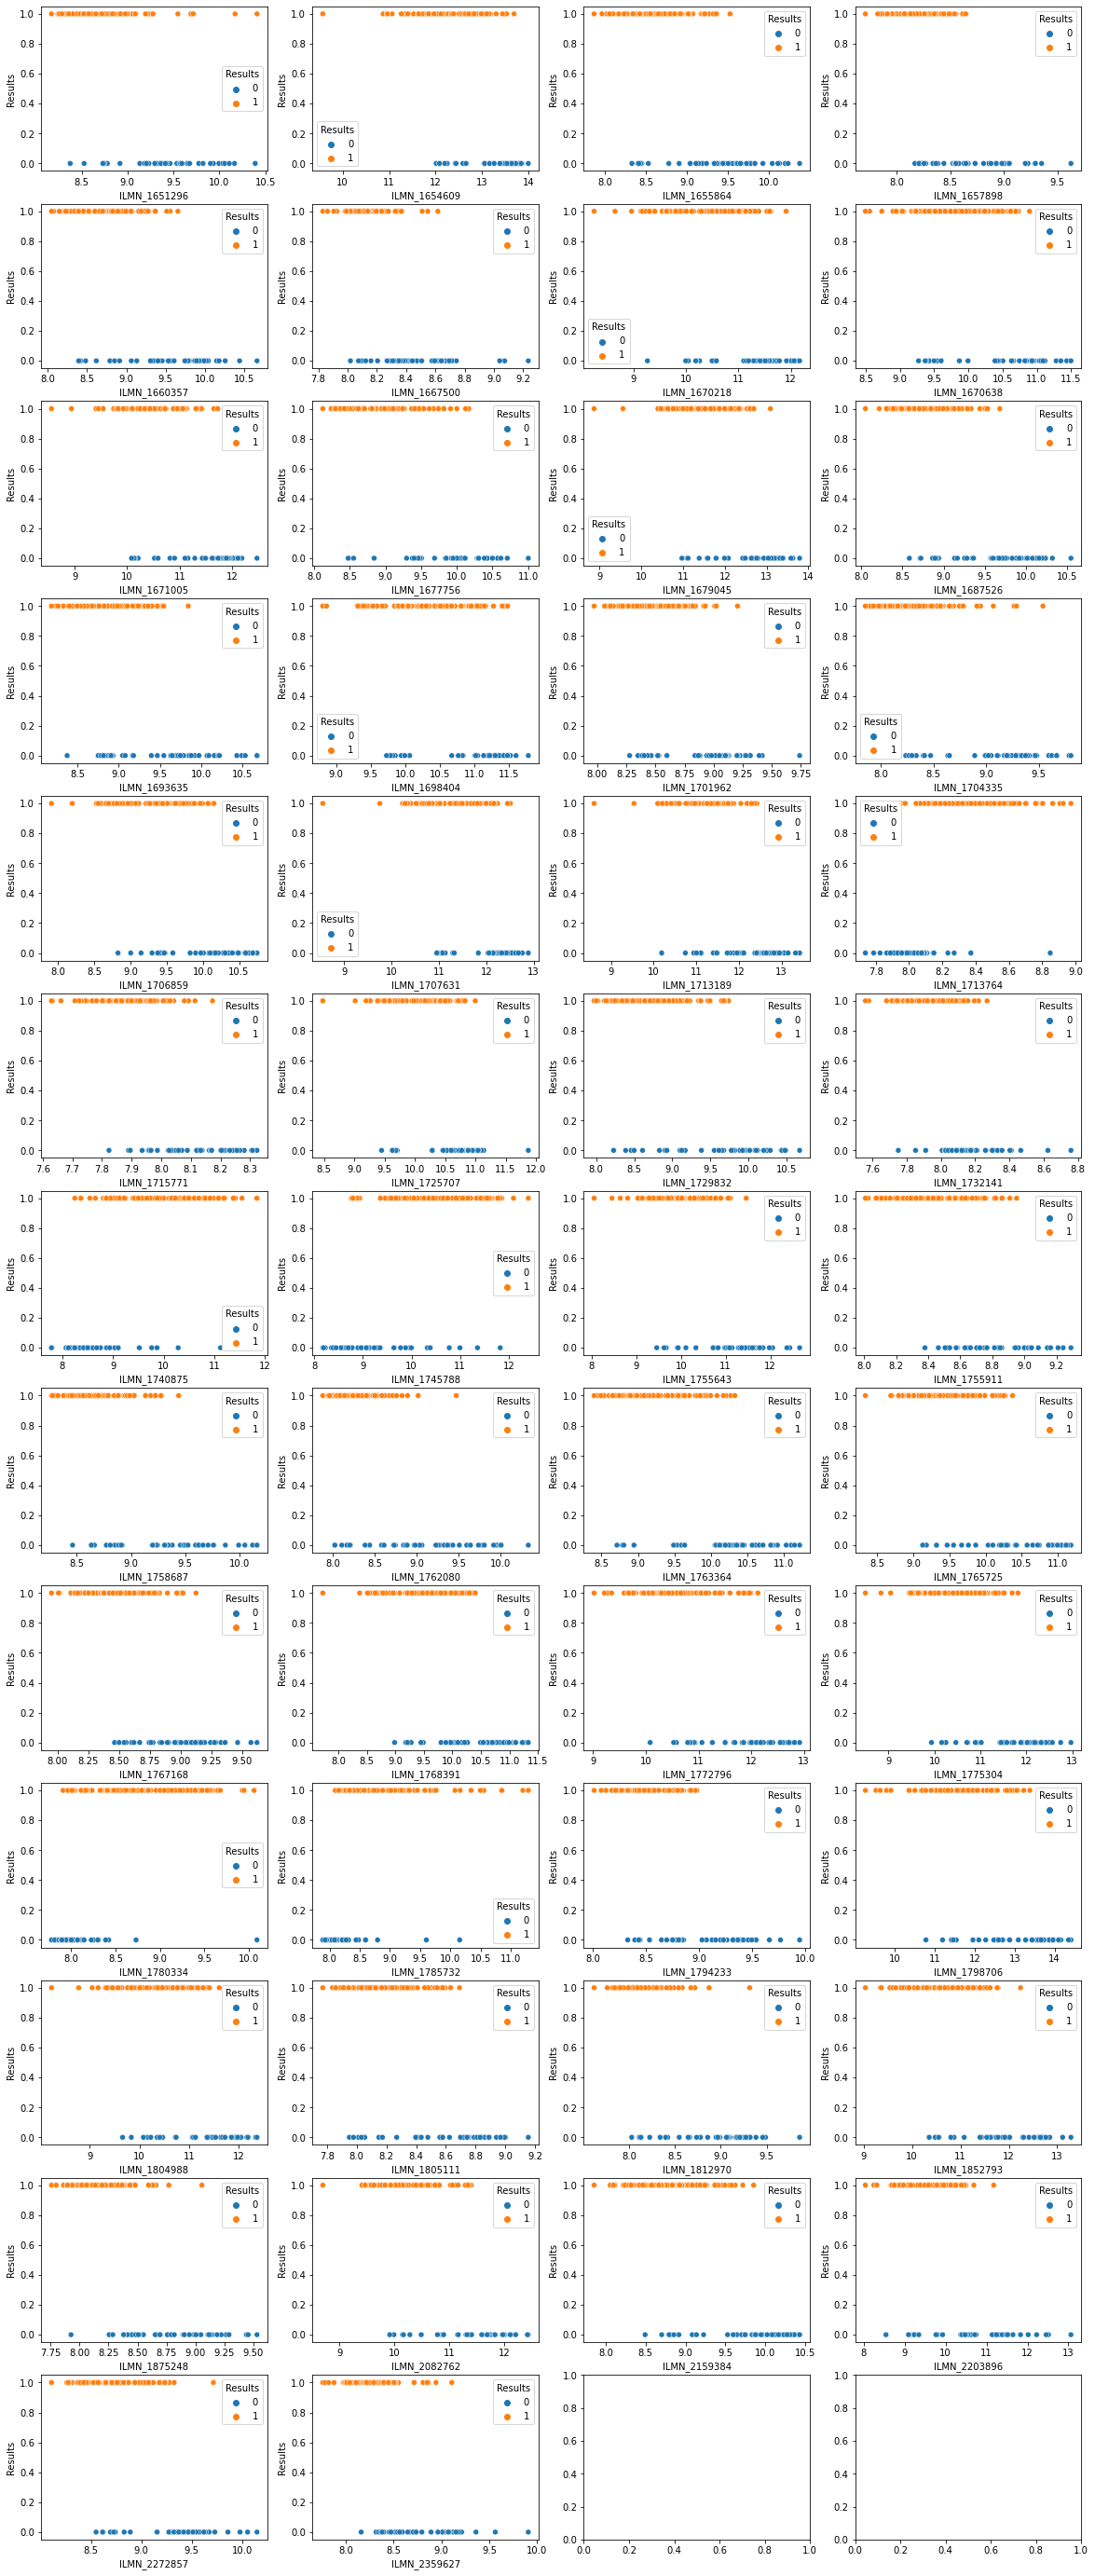

In [20]:
fig, axes = plt.subplots(13,4, figsize=(20,50))
x_,y_ = 0,0
for i, column in enumerate(df.columns[0:-1]):    
    sb.scatterplot(x=column,y='Results',data=df,hue='Results',ax=axes[x_][y_]) 
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7:
        x_ = 2
        y_ = 0
    elif i == 11:
        x_ = 3
        y_ = 0
    elif i == 15:
        x_ = 4
        y_ = 0
    elif i == 19:
        x_ = 5
        y_ = 0
    elif i == 23:
        x_ = 6
        y_ = 0
    elif i == 27:
        x_ = 7
        y_ = 0
    elif i == 31:
        x_ = 8
        y_ = 0
    elif i == 35:
        x_ = 9
        y_ = 0
    elif i == 39:
        x_ = 10
        y_ = 0
    elif i == 43:
        x_ = 11
        y_ = 0
    elif i == 47:
        x_ = 12
        y_ = 0

    else:
        y_ += 1